In [1]:
import numpy as np
import matplotlib.pyplot as plt
from opfunu.cec_based.cec2014 import F52014, F92014
from mealpy import FloatVar, GA, ABC

In [2]:
ndim = 10

f5 = F52014(ndim=ndim).evaluate
f9 = F92014(ndim=ndim).evaluate

def experiment_ABC(f, pop=50, elite_best=0.1, elite_worst=0.3):
    problem_dict = {
        "obj_func": f,
        "bounds": FloatVar(lb=(-100.0,) * ndim, ub=(100.0,) * ndim),
        "minmax": "min",
        "log_to": "None",
        "save_population": True,
    }

    model = ABC.OriginalABC(
        epoch=1000,
        pop_size=pop,
        selection="tournament",
        crossover="uniform",
        elite_best=elite_best,
        elite_worst=elite_worst,
    )

    best1 = model.solve(problem_dict)
    return best1, model

def experiment_GA(f, pop=50, elite_best=0.1, elite_worst=0.3):
    problem_dict = {
        "obj_func": f,
        "bounds": FloatVar(lb=(-100.0,) * ndim, ub=(100.0,) * ndim),
        "minmax": "min",
        "log_to": "None",
        "save_population": True,
    }

    model = GA.EliteSingleGA(
        epoch=1000,
        pop_size=pop_size,
        selection="tournament",
        crossover="uniform",
        elite_best=elite_best,
        elite_worst=elite_worst,
    )

    best1 = model.solve(problem_dict)
    return best1, model

# Run experiments
funcs = [{"name": "f5", "ref": f5}, {"name": "f9", "ref": f9}]
pop_size = 50
elite_best = 0.2
elite_worst = 0.2
iterations = 10
results = []

for f in funcs:
    results.append({
        "function": f["name"],
        "population": pop_size,
        "elite_best": elite_best,
        "elite_worst": elite_worst,
        "iterations": []
    })
    for _ in range(iterations):
        best_ABC, model_ABC = experiment_ABC(f["ref"], pop_size, elite_best, elite_worst)
        results[-1]["iterations"].append({
            "global_fitness_history": model_ABC.history.list_global_best_fit,
        })
        best_GA, model_GA = experiment_GA(f["ref"], pop_size, elite_best, elite_worst)
        results[-1]["iterations"].append({
            "global_fitness_history": model_ABC.history.list_global_best_fit,
        })

results

[{'function': 'f5',
  'population': 50,
  'elite_best': 0.2,
  'elite_worst': 0.2,
  'iterations': [{'global_fitness_history': [520.7077433239085,
     520.7077433239085,
     520.7077433239085,
     520.7077433239085,
     520.7077433239085,
     520.7077433239085,
     520.7077433239085,
     520.7077433239085,
     520.7077433239085,
     520.5429807512294,
     520.5429807512294,
     520.5429807512294,
     520.5429807512294,
     520.5429807512294,
     520.5429807512294,
     520.5429807512294,
     520.5429807512294,
     520.5429807512294,
     520.5429807512294,
     520.5429807512294,
     520.5429807512294,
     520.5429807512294,
     520.5429807512294,
     520.5429807512294,
     520.5429807512294,
     520.5429807512294,
     520.5429807512294,
     520.5429807512294,
     520.5429807512294,
     520.5429807512294,
     520.5429807512294,
     520.5429807512294,
     520.5429807512294,
     520.5429807512294,
     520.5429807512294,
     520.5429807512294,
     520.5429

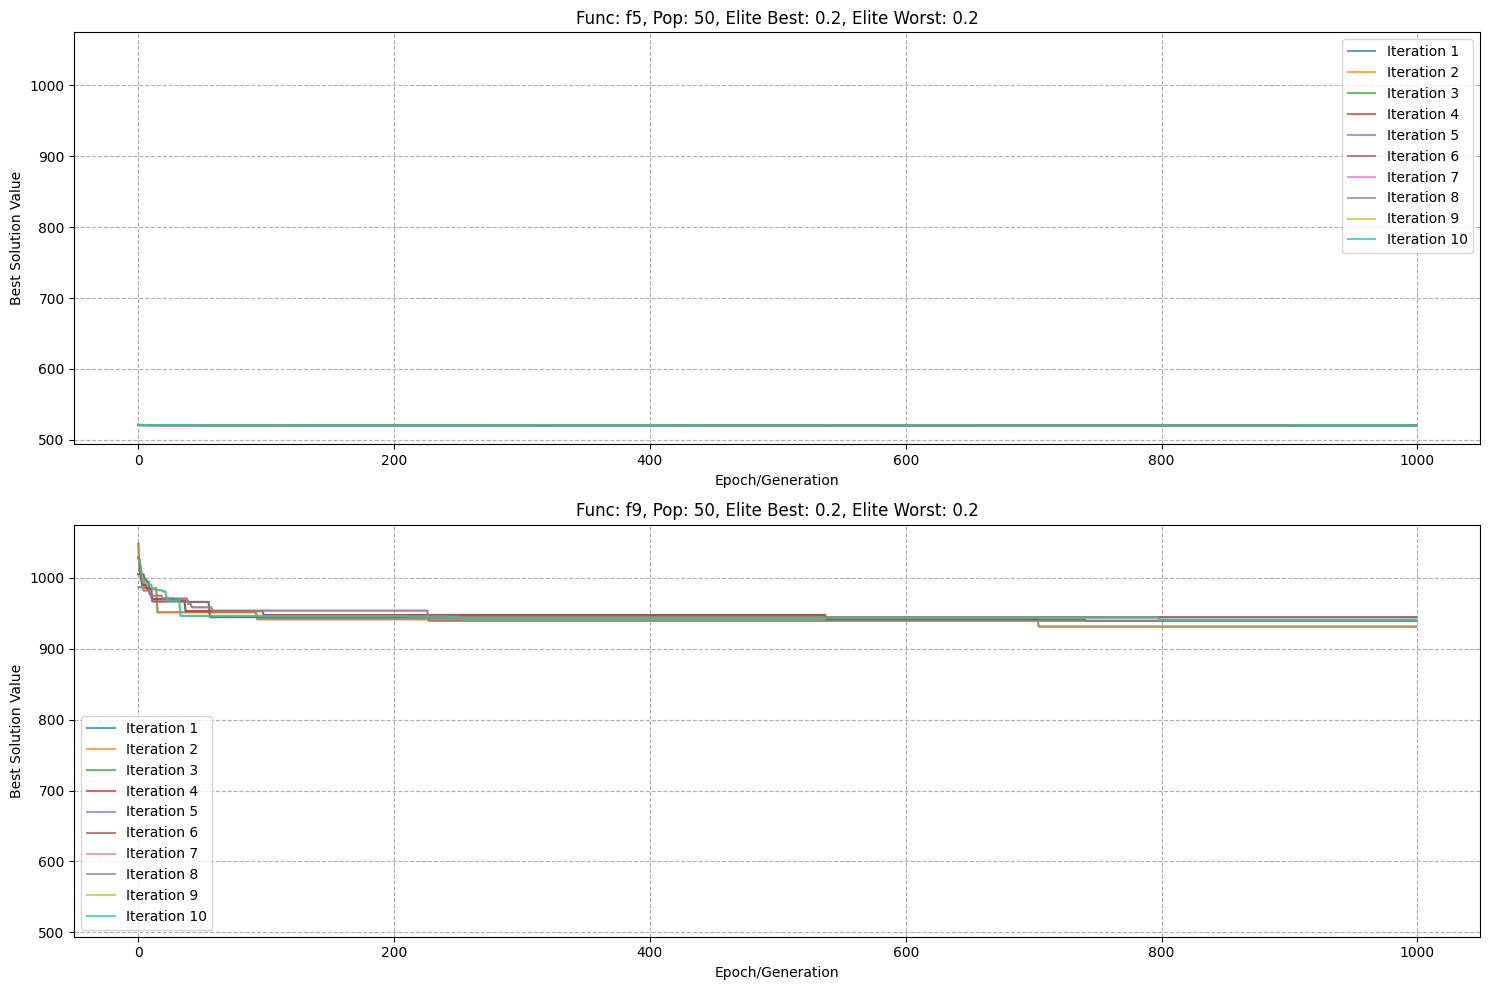

In [3]:
n_rows = len(results)
n_cols = len(results[0]["iterations"][0]["global_fitness_history"])

fig, axes = plt.subplots(nrows=n_rows, ncols=1, figsize=(15, n_rows * 5), sharey=True)

for i, result in enumerate(results):
    ax = axes[i]
    for j in range(iterations):
        ax.plot(result["iterations"][j]["global_fitness_history"], label=f'Iteration {j+1}', alpha=0.7)
    
    ax.set_title(f'Func: {result["function"]}, Pop: {result["population"]}, Elite Best: {result["elite_best"]}, Elite Worst: {result["elite_worst"]}')
    ax.set_xlabel('Epoch/Generation')
    ax.set_ylabel('Best Solution Value')
    ax.grid(True, which="both", ls="--")
    ax.legend(loc='best')

plt.tight_layout()
plt.show()
